# Het verschil tussen startpositie en strategie

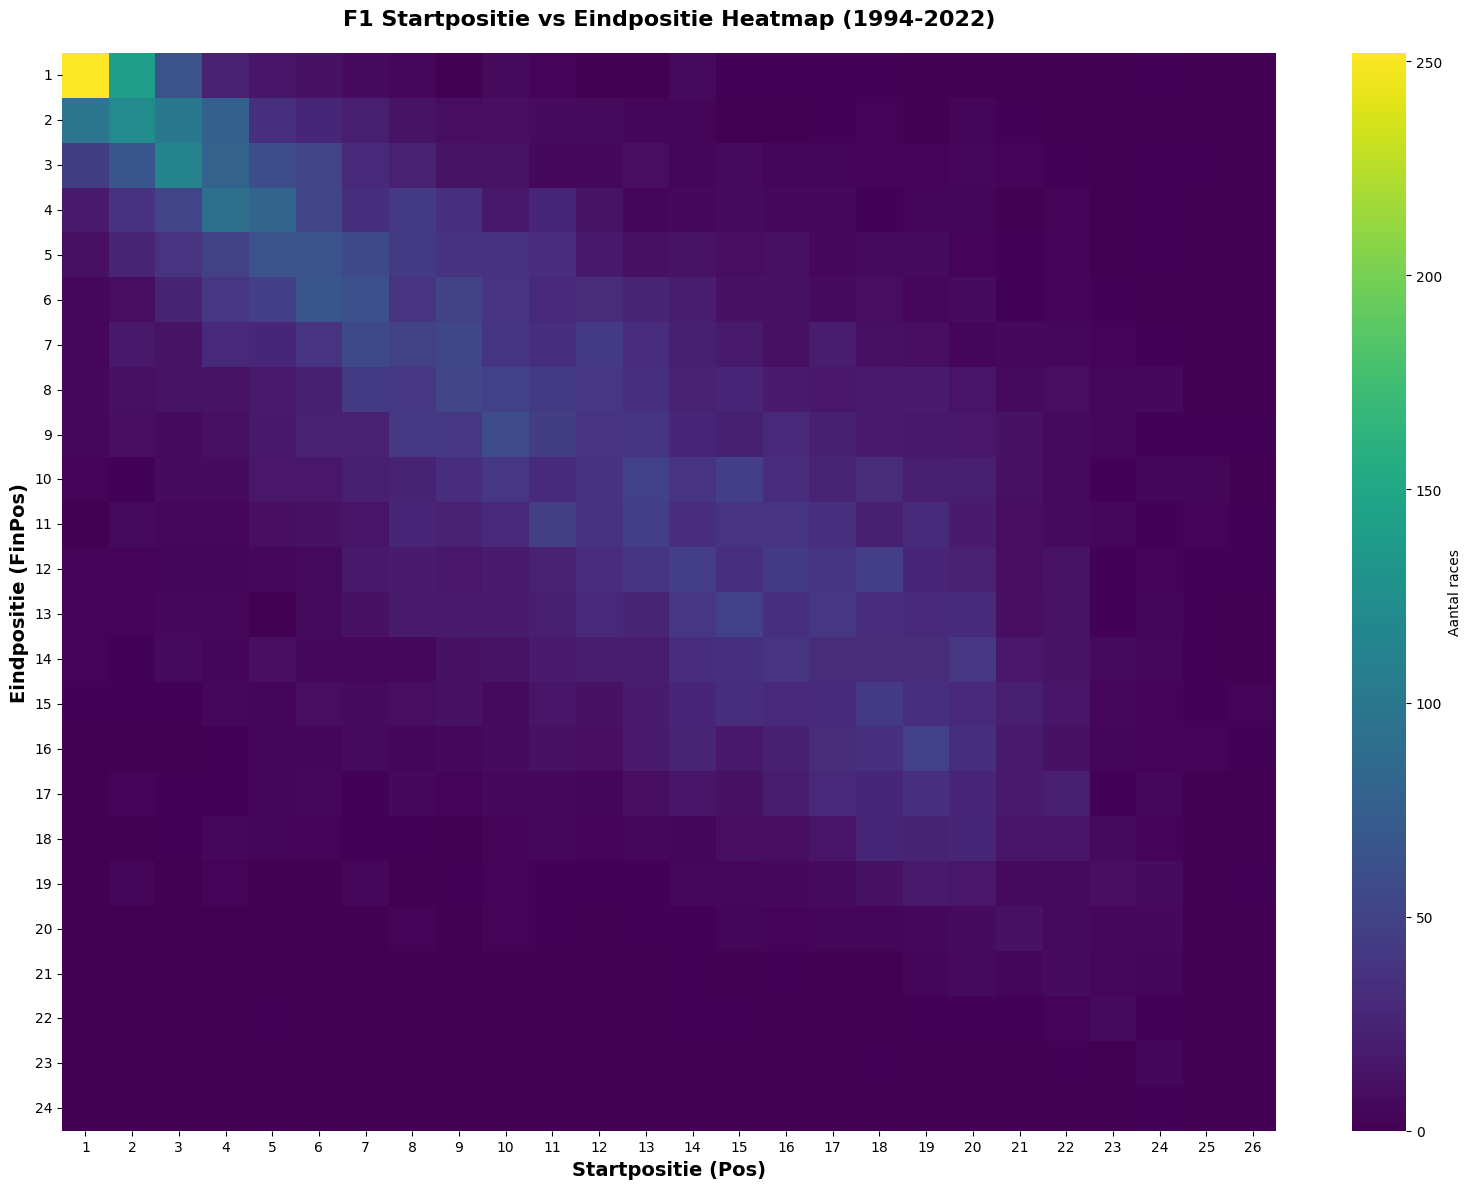

Win percentage vanaf pole: 55.9%
1. Start P1 → Finish P1: 252 keer
2. Start P2 → Finish P1: 140 keer
3. Start P2 → Finish P2: 122 keer
4. Start P3 → Finish P3: 113 keer
5. Start P3 → Finish P2: 101 keer
P1: 55.9% (252/451)
P2: 31.0% (140/451)
P3: 14.2% (64/451)
P4: 5.2% (23/440)
P5: 3.4% (14/409)
P6: 2.7% (11/414)
P7: 1.7% (7/413)
P8: 1.0% (4/402)
P9: 0.0% (0/405)
P10: 1.5% (6/403)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Stel de plot stijl in
plt.style.use('default')
sns.set_palette("viridis")

# Laad de F1 dataset
df = pd.read_csv('merged_f1_data_1994_2022.csv')
# Converteer Pos en FinPos naar numeriek, invalid waarden worden NaN
df['Pos_numeric'] = pd.to_numeric(df['Pos'], errors='coerce')
df['FinPos_numeric'] = pd.to_numeric(df['FinPos'], errors='coerce')

# Filter alleen geldige numerieke waarden
valid_data = df[
    (df['Pos_numeric'].notna()) & 
    (df['FinPos_numeric'].notna()) & 
    (df['Pos_numeric'] > 0) & 
    (df['FinPos_numeric'] > 0)
].copy()
# Bereken de grenzen voor de heatmap
max_start_pos = int(valid_data['Pos_numeric'].max())
max_finish_pos = int(valid_data['FinPos_numeric'].max())
# Maak een matrix met alle mogelijke combinaties
heatmap_data = np.zeros((max_finish_pos, max_start_pos))

# Vul de matrix met het aantal keren dat elke combinatie voorkomt
for _, row in valid_data.iterrows():
    start_pos = int(row['Pos_numeric']) - 1  # -1 voor 0-indexing
    finish_pos = int(row['FinPos_numeric']) - 1  # -1 voor 0-indexing
    heatmap_data[finish_pos, start_pos] += 1
# Maak de heatmap visualisatie
plt.figure(figsize=(16, 12))

# Maak de heatmap met originele count waarden
ax = sns.heatmap(
    heatmap_data,
    cmap='viridis',
    cbar_kws={'label': 'Aantal races'},
    xticklabels=range(1, max_start_pos + 1),
    yticklabels=range(1, max_finish_pos + 1),
    annot=False,  # Zet op True als je de exacte cijfers in elke cel wilt zien
    fmt='g'
)

# Stel labels en titel in
plt.title('F1 Startpositie vs Eindpositie Heatmap (1994-2022)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Startpositie (Pos)', fontsize=14, fontweight='bold')
plt.ylabel('Eindpositie (FinPos)', fontsize=14, fontweight='bold')

# Roteer x-axis labels voor betere leesbaarheid
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Pas de layout aan
plt.tight_layout()

# Voeg een grid toe voor betere leesbaarheid
ax.grid(False)

plt.show()

# Hoeveel keer won iemand vanaf pole position?
pole_wins = heatmap_data[0, 0]  # [eindpositie-1, startpositie-1]
total_pole_starts = heatmap_data[:, 0].sum()
pole_win_percentage = (pole_wins / total_pole_starts) * 100
print(f"Win percentage vanaf pole: {pole_win_percentage:.1f}%")

# Top 5 meest voorkomende startpositie -> eindpositie combinaties
top_combinations = []
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        if heatmap_data[i, j] > 0:
            top_combinations.append((i+1, j+1, int(heatmap_data[i, j])))

top_combinations.sort(key=lambda x: x[2], reverse=True)

for i, (finish_pos, start_pos, count) in enumerate(top_combinations[:5]):
    print(f"{i+1}. Start P{start_pos} → Finish P{finish_pos}: {count} keer")

# Bereken conversion rates voor top startposities
for start_pos in range(1, min(11, max_start_pos + 1)):
    wins = heatmap_data[0, start_pos-1]  # Eindpositie 1 (index 0)
    total_starts = heatmap_data[:, start_pos-1].sum()
    if total_starts > 0:
        win_rate = (wins / total_starts) * 100
        print(f"P{start_pos}: {win_rate:.1f}% ({int(wins)}/{int(total_starts)})")